In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
a = torch.randn(2, 3).to_sparse().requires_grad_(True)
print(a)
#a.values = torch.ones_like(a.values())
values = torch.ones(a._nnz())
#len(a.values)
a.indices()
sparse_tensor = torch.sparse_coo_tensor(a.indices(), torch.ones(a._nnz()), a.size(), requires_grad=True)
sparse_tensor

tensor(indices=tensor([[0, 0, 0, 1, 1, 1],
                       [0, 1, 2, 0, 1, 2]]),
       values=tensor([-1.5739,  0.8701, -1.0836, -0.5634, -1.1361,  0.4146]),
       size=(2, 3), nnz=6, layout=torch.sparse_coo, requires_grad=True)


tensor(indices=tensor([[0, 0, 0, 1, 1, 1],
                       [0, 1, 2, 0, 1, 2]]),
       values=tensor([1., 1., 1., 1., 1., 1.]),
       size=(2, 3), nnz=6, layout=torch.sparse_coo, requires_grad=True)

In [6]:
# Read in the data
#df = pd.read_csv('results/Relations_Important_all.csv', sep=',')
df = pd.read_csv('/Users/macoftraopia/Documents/GitHub/RGCN-Explainer/Relation_Importance_aifb/size_0.005_lr_0.1_epochs_30_threshold_0.5_init_normal/Relations_Important_all_aifb.csv', sep=',')
df.set_index('node_idx', inplace=True)
df['tot'] = df.sum(axis=1) - df['label'] - df['number_neighbors']-2
gb = df.groupby('label')    
#gb.get_group(0)
df.head(5)

/var/folders/ww/33zq_rh50tx94n81lb4thx0w0000gn/T/ipykernel_84141/3161284500.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['tot'] = df.sum(axis=1) - df['label'] - df['number_neighbors']-2


,label,number_neighbors,prediction_explain,prediction_full,prediction_explain_binary,abstract,address,author,booktitle,carriedOutBy,...,worksAtProject,year,type.1,type.2,range,subClassOf,allValuesFrom,inverseOf,onProperty,tot
node_idx,,,,,,,,,,,,,,,,,,,,,
5678,0,3787,[0.4521174 0.19075242 0.29380494 0.06332523],[9.8646963e-01 5.4700294e-04 1.2982166e-02 1.1...,[0.45493937 0.17929035 0.28605053 0.07971972],311,NaN,15.0,NaN,NaN,...,1.0,NaN,260,260,NaN,NaN,NaN,NaN,NaN,1140.0
5724,0,1359,[0.30507535 0.24287464 0.23541228 0.21663766],[0.39725292 0.20592682 0.26314494 0.13367526],[0.31801832 0.25496924 0.22520377 0.20180866],977,NaN,4.0,NaN,NaN,...,NaN,NaN,791,791,NaN,NaN,NaN,NaN,NaN,3534.0
5699,0,1316,[0.2667667 0.254535 0.23132335 0.24737498],[0.26639837 0.256873 0.22420037 0.2525283 ],[0.27489534 0.23317829 0.22775564 0.26417074],1020,NaN,NaN,NaN,NaN,...,NaN,NaN,833,833,NaN,NaN,NaN,NaN,NaN,3704.0
5688,0,1288,[0.2860635 0.24342969 0.23553829 0.2349686 ],[0.28961223 0.24187674 0.23310687 0.2354041 ],[0.30200055 0.23731732 0.21932699 0.24135521],964,NaN,NaN,NaN,NaN,...,NaN,NaN,803,803,NaN,NaN,NaN,NaN,NaN,3532.0
5702,0,1340,[0.2916405 0.24660058 0.23825403 0.22350489],[0.31579158 0.21419065 0.29872063 0.17129713],[0.2758697 0.26647145 0.2293997 0.22825916],953,NaN,2.0,NaN,NaN,...,NaN,NaN,789,789,NaN,NaN,NaN,NaN,NaN,3482.0


In [7]:

obj = list(df['prediction explain'])[0]
my_list = obj[1:-1].split()
my_list = [float(num) for num in my_list]
print(np.argmax(my_list))


KeyError: 'prediction explain'

In [8]:
import numpy as np

def full_vs_explain(df):
    mismatch = []
    match = []
    for index, row in df.iterrows():
        obj = row['prediction_explain_binary']
        obj = row['prediction_explain']
        my_list = obj[1:-1].split()
        my_list = [float(num) for num in my_list]
        explain = np.argmax(my_list)
        
        obj = row['prediction_full']
        my_list = obj[1:-1].split()
        my_list = [float(num) for num in my_list]
        full = np.argmax(my_list)
        original = row['label']

        if full == explain:
            #print(f"Row {index}: Full and explain match.")
            match.append(index)
        elif original != explain:
            #print(f"Row {index}: Full and explain differ.")
            mismatch.append(index)
        elif full == explain != row['label']:
            print(f"Row {index}: Full and explain match but not label.")
        elif full != explain == row['label']:
            print(f"Row {index}: Full and explain differ but explain match label.")
    print(f"Total mismatch: {len(mismatch)}")
    print(f"Mismatch: {mismatch}")
    return mismatch, match



mismatch, match = full_vs_explain(df)


Row 5783: Full and explain differ but explain match label.
Total mismatch: 3
Mismatch: [5839, 5844, 5854]


In [11]:
df.loc[5839]

label                                                                    2
number_neighbors                                                     12620
prediction_explain           [0.27299026 0.25362104 0.26135448 0.21203429]
prediction_full              [0.21621688 0.24502543 0.4473324  0.09142534]
prediction_explain_binary    [0.26619673 0.27663335 0.23298281 0.22418709]
abstract                                                               250
address                                                                NaN
author                                                                 3.0
booktitle                                                              NaN
carriedOutBy                                                           NaN
carriesOut                                                             NaN
chapter                                                                NaN
dealtWithIn                                                            NaN
edition                  

In [9]:
selected_rows = df.loc[mismatch]['number_neighbors']
selected_rows

node_idx
5839    12620
5844     1352
5854     2880
Name: number_neighbors, dtype: int64

In [10]:
#Get the relative importance of each relation for each class (divided by the total importance score of the class)


for i in np.unique(df['label']):
    exec(f'group_{i} = gb.get_group(i)')
    exec(f'group_rel_{i} = group_{i}.iloc[:,1:].div(group_{i}.tot, axis=0)')
    exec(f'group_rel_{i} = group_rel_{i}.drop(columns=["tot"])')
    exec(f'group_max_{i} = group_rel_{i}.idxmax(axis=1)')

#group_rel_0
print('group_max_0: \n', group_max_0.value_counts(),
      '\n group_max_1 \n', group_max_1.value_counts(),#,
         '\n group_max_2 \n', group_max_2.value_counts(),
         '\n group_max_3 \n', group_max_3.value_counts())


TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [23]:
print('group_max_0: \n', group_max_0.value_counts)

group_max_0: 
 <bound method IndexOpsMixin.value_counts of node_idx
5678      publishes
5724         author
5699            fax
5688            fax
5702         author
5714            fax
5708            fax
5843        isAbout
5873            fax
5697            fax
5783         author
5701            fax
5845    dealtWithIn
5778         author
dtype: object>


In [15]:
group_max_0#.dropna(axis=1, how='all')


node_idx
5678      publishes
5724         author
5699            fax
5688            fax
5702         author
5714            fax
5708            fax
5843        isAbout
5873            fax
5697            fax
5783         author
5701            fax
5845    dealtWithIn
5778         author
dtype: object

In [16]:
df_rel = df.iloc[:,1:].div(df.tot, axis=0)
df_rel['label'] = df['label']

df_rel.dropna(axis=1, how='all')


,author,carriedOutBy,carriesOut,dealtWithIn,editor,fax,hasProject,homepage,isAbout,isWorkedOnBy,...,photo,projectInfo,publication,publishes,type,worksAtProject,type.1,type.2,tot,label
node_idx,,,,,,,,,,,,,,,,,,,,,
5678,0.103448,0.017241,0.017241,0.086207,0.017241,0.017241,0.051724,0.017241,0.086207,0.068966,...,0.017241,0.051724,0.155172,0.172414,0.017241,0.017241,0.017241,0.017241,1.0,0
5724,0.125000,NaN,NaN,NaN,NaN,0.125000,NaN,0.125000,NaN,NaN,...,NaN,NaN,NaN,NaN,0.125000,NaN,0.125000,0.125000,1.0,0
5699,NaN,NaN,NaN,NaN,NaN,0.250000,NaN,0.250000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
5688,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
5702,0.250000,NaN,NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
5714,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
5708,NaN,NaN,NaN,NaN,NaN,0.250000,NaN,0.250000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
5843,0.181818,NaN,NaN,0.045455,NaN,0.045455,0.090909,NaN,0.272727,0.136364,...,NaN,0.045455,0.090909,NaN,NaN,NaN,NaN,NaN,1.0,0
5873,NaN,NaN,NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,...,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0


In [31]:
from collections import Counter
Counter(df_rel['label'])

Counter({0: 14, 1: 4, 2: 11, 3: 6})

In [37]:
#select one row of df according to node_idx index value
df_rel.loc[5757].sort_values()



name              0.0625
type              0.0625
type.1            0.0625
type.2            0.0625
publication       0.2500
author            0.3750
tot               1.0000
label             2.0000
abstract             NaN
address              NaN
booktitle            NaN
carriedOutBy         NaN
carriesOut           NaN
chapter              NaN
dealtWithIn          NaN
edition              NaN
editor               NaN
fax                  NaN
financedBy           NaN
finances             NaN
hasProject           NaN
head                 NaN
homepage             NaN
howpublished         NaN
isAbout              NaN
isWorkedOnBy         NaN
isbn                 NaN
journal              NaN
member               NaN
month                NaN
note                 NaN
number               NaN
pages                NaN
phone                NaN
photo                NaN
projectInfo          NaN
publishes            NaN
series               NaN
title                NaN
volume               NaN


In [39]:
a = torch.load('/Users/macoftraopia/Documents/GitHub/RGCN-Explainer/chk/mdgenre_chk/prediction_mdgenre_prune_False')
a.shape

torch.Size([3000, 12])

In [28]:
for i in np.unique(df_rel['label']):
    exec(f'group_{i} = gb.get_group(i)')
    exec(f'group_rel_{i} = group_{i}.iloc[:,1:].div(group_{i}.tot, axis=0)')
    exec(f'group_rel_{i} = group_rel_{i}.drop(columns=["tot"])')
    exec(f'group_max_{i} = group_rel_{i}.idxmax(axis=1)')

#group_rel_0
print('group_max_0: \n', group_max_0.value_counts(),
      '\n group_max_1 \n', group_max_1.value_counts(),#,
         '\n group_max_2 \n', group_max_2.value_counts(),
         '\n group_max_3 \n', group_max_3.value_counts())

group_max_0: 
 fax            7
author         4
publishes      1
isAbout        1
dealtWithIn    1
dtype: int64 
 group_max_1 
 isAbout    2
author     2
dtype: int64 
 group_max_2 
 author         5
isAbout        3
hasProject     1
projectInfo    1
publication    1
dtype: int64 
 group_max_3 
 isAbout        3
author         1
publication    1
fax            1
dtype: int64


In [29]:
print('group_max_0: \n', group_max_0.value_counts, )

group_max_0: 
 <bound method IndexOpsMixin.value_counts of node_idx
5678      publishes
5724         author
5699            fax
5688            fax
5702         author
5714            fax
5708            fax
5843        isAbout
5873            fax
5697            fax
5783         author
5701            fax
5845    dealtWithIn
5778         author
dtype: object>


In [17]:
from dfply import *
# summary statistics for dependent variable AUTHOR
df_rel >> group_by(X.label) >> summarize(n=X['author'].count(), mean=X['author'].mean(), std=X['author'].std())
# output

,label,n,mean,std
0,0,7,0.195746,0.095461
1,1,4,0.151612,0.025134
2,2,11,0.176738,0.125399
3,3,4,0.132441,0.019422


In [18]:
from dfply import *
# summary statistics for dependent variable AUTHOR
df_rel >> group_by(X.label) >> summarize(n=X['dealtWithIn'].count(), mean=X['dealtWithIn'].mean(), std=X['dealtWithIn'].std())
# output

,label,n,mean,std
0,0,3,0.092372,0.050284
1,1,1,0.032258,NaN
2,2,5,0.026256,0.017000
3,3,1,0.055556,NaN


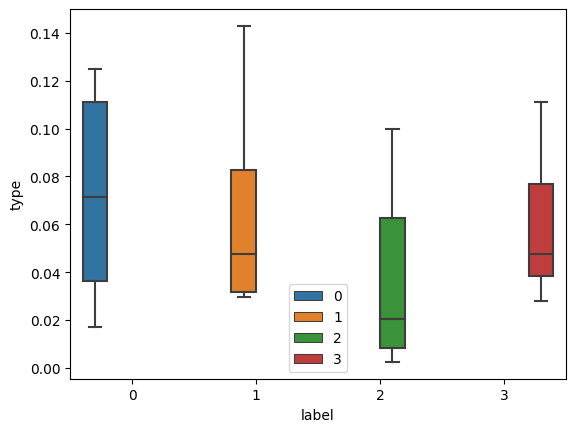

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
#fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df_rel, x="label", y="type",  hue=df.label.tolist())
#sns.boxplot(data=df_rel, x="plant_var", y="canopy_vol", hue=df.plant_var..tolist(), ax=axs[1])
plt.show()

In [20]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('author + fax ~ label', data=df)
print(fit.mv_test())

                                Multivariate linear model
                                                                                         
-----------------------------------------------------------------------------------------
       Intercept                Value         Num DF Den DF        F Value         Pr > F
-----------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 2.0000 9.0000 -2895171189023894.5000 1.0000
         Pillai's trace                1.0000 2.0000 9.0000 -2895171189023895.0000 1.0000
 Hotelling-Lawley trace -643371375338643.2500 2.0000 9.0000 -2895171189023894.5000 1.0000
    Roy's greatest root -643371375338643.2500 2.0000 9.0000 -2895171189023894.5000 1.0000
-----------------------------------------------------------------------------------------
                                                                                         
------------------------------------------

In [21]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(group_rel_0['author'], group_rel_1['author'])
print(fvalue, pvalue)

nan nan
